****<h1><font color="orange" size=25><center>Taxi_Fare_prediction</center></font><h1>

<img src="https://techdrive.co/wp-content/uploads/2018/06/ford-taxis-promo.jpg">

In [2]:
#importing libraries need to evalute
import seaborn as sns
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/test-data/test.csv
/kaggle/input/taxifare/TaxiFare.csv
/kaggle/input/hmara/hmara_func.py


<h1><font color="orange"><center>Data load</center></font><h1>

In [3]:
#load train data into dataframe 
df=pd.read_csv("/kaggle/input/taxifare/TaxiFare.csv",parse_dates=["date_time_of_pickup"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


 <ul style="list-style-type:disc">
      50,000 entries and 12 columns. 
     <li><b>1.unique_id:</b> Object type, presumably a unique identifier for each entry.</li>
     <li><b>2.amount: </b>Floating-point numbers representing some form of monetary value.</li>
     <li><b>3.date_time_of_pickup:</b> Datetime objects in UTC format, indicating the date and time of pickup.</li>
     <li><b>4.longitude_of_pickup / latitude_of_pickup: </b>Floating-point numbers representing the coordinates of the pickup location.</li>
     <li><b>5.longitude_of_dropoff / latitude_of_dropoff:</b> Floating-point numbers representing the coordinates of the drop-off location..</li>
     <li><b>6.no_of_passenger: </b>Integer values indicating the number of passengers..</li>
     <li><b>7.hour / week_day / month: </b>Integer values, potentially derived from the datetime, indicating the hour, day of the week, and month, respectively..</li>
     <li> <b>8.distance:</b> Floating-point numbers representing the distance traveled, likely calculated from coordinates..</li>
</ul>
The DataFrame seems to contain details of trips or transportation data, presumably with information about fares, locations, timestamps, distances, and passenger counts.

The memory usage is around 4.2+ MB for this DataFrame, which is moderate given the size of 50,000 entries and the data types used in each column.

Is there something specific you'd like to know or do with this DataFrame?<p>

<h1><font color="orange"><center>Feature Enginearing </center></font><h1>

In [5]:
# from pickup date extract hour information and add new feature to data
df["hour"] =  df.date_time_of_pickup.dt.hour

In [6]:
# from pickup date extract weekday information and add new feature to data
df["week_day"]= df.date_time_of_pickup.apply(lambda x : x.weekday())

In [7]:
# function for change data into distance in km
from math import cos, asin, sqrt, pi

def distance(lon1,lat1,lon2,lat2):
    r = 6371 # km
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [8]:
# new feature/column for data frame  distance 
data =[]
for x in df.iloc[:,3:7].values:
  data.append(round(distance(x[0],x[1],x[2],x[3]),2))
  
df["distance"] = data

In [9]:
# from pickup date extract month information and add new feature to data
df["month"] = df["date_time_of_pickup"].dt.month

In [12]:
# descraptive statistics about data
df.describe().T

count       mean         std        min        25%  \
amount                50000.0  11.364171    9.685557  -5.000000   6.000000   
longitude_of_pickup   50000.0 -72.509756   10.393860 -75.423848 -73.992062   
latitude_of_pickup    50000.0  39.933759    6.224857 -74.006893  40.734880   
longitude_of_dropoff  50000.0 -72.504616   10.407570 -84.654241 -73.991152   
latitude_of_dropoff   50000.0  39.926251    6.014737 -74.006377  40.734372   
no_of_passenger       50000.0   1.667840    1.289195   0.000000   1.000000   
hour                  50000.0  13.489080    6.506935   0.000000   9.000000   
week_day              50000.0   3.029980    1.956936   0.000000   1.000000   
distance              50000.0  18.508932  355.564283   0.000000   1.220000   
month                 50000.0   6.273300    3.461157   1.000000   3.000000   

                            50%        75%          max  
amount                 8.500000  12.500000   200.000000  
longitude_of_pickup  -73.981840 -73.967148    40.783472  
latitude_of_pickup    40.752678  40.767360   401.083332  
longitude_of_dropoff -73.980082 -73.963584    40.851027  
latitude_of_dropoff   40.753372  40.768167    43.415190  
no_of_passenger        1.000000   2.000000     6.000000  
hour                  14.000000  19.000000    23.000000  
week_day               3.000000   5.000000     6.000000  
distance               2.120000   3.900000  8667.820000  
month                  6.000000   9.000000    12.000000

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   hour                  50000 non-null  int32              
 9   week_day              50000 non-null  int64              
 10  distance              50000 non-null  float64            
 11  month                 50000 non-null  int32              
dtypes: d

# Note**now we add three new feature's thats extract from date_time of_pickup because we undestand data from when a costomer book a ride
# so hour,week_day,distance

In [14]:
# cheaking duplicate rows in data
df.duplicated().sum()

0

# there is no duplicate values/rows in data

In [15]:
# cheaking null values in each column
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
hour                    0
week_day                0
distance                0
month                   0
dtype: int64

# No null values in data

<h1><font color="orange"><center>EDA</center></font><h1>

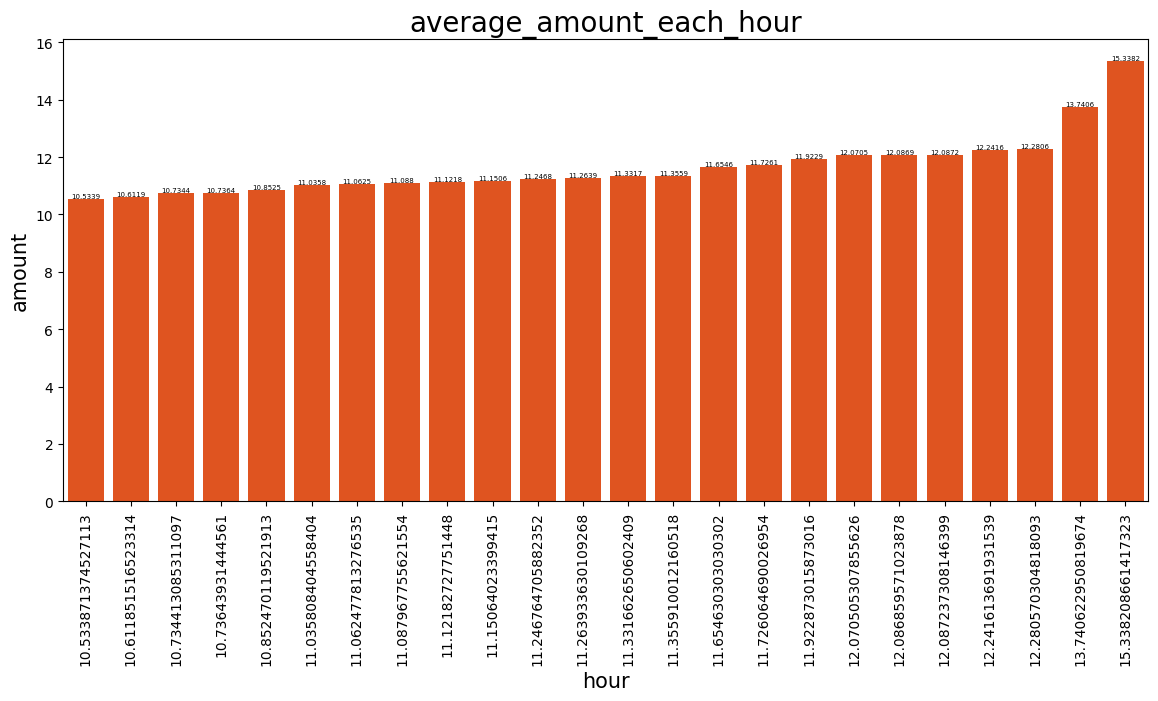

In [16]:
# grouping data basis on each hour for finding average amount each hour
hour_data = df.groupby(["hour"])["amount"].mean()


#ploting average amount each hour
plt.figure(figsize=(14,6))
fig = sns.barplot(data=hour_data,x=np.arange(24),y=hour_data,color="orangered")
[fig.bar_label(cont,fontsize=5) for cont in  fig.containers]
plt.xticks(rotation=90)
plt.title("average_amount_each_hour",fontsize=20)
plt.xlabel("hour",fontsize=15)
plt.ylabel("amount",fontsize=15)
plt.show()


### almost every hour near 10,11 averge charge per hour expect mid night 11,12 bit high and also tell that data is newyork time and we are analysing in indian time there is lag in time

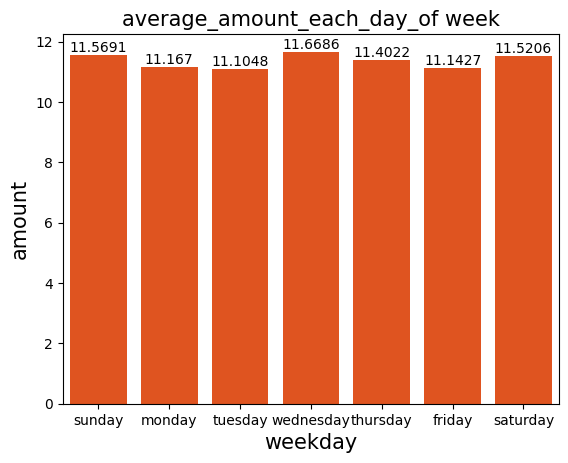

In [17]:
# calculating average amount weekday average amount 
week_data = df.groupby("week_day")["amount"].mean()

#ploting average amount weekday
fig = sns.barplot(data=week_data,x=["sunday","monday","tuesday","wednesday","thursday","friday","saturday"],y=week_data,color="orangered")
[fig.bar_label(cont,fontsize=10) for cont in fig.containers]
plt.title("average_amount_each_day_of week",fontsize=15)
plt.xlabel("weekday",fontsize=15)
plt.ylabel("amount",fontsize=15)
plt.show()


### alomost same charge on every weekday

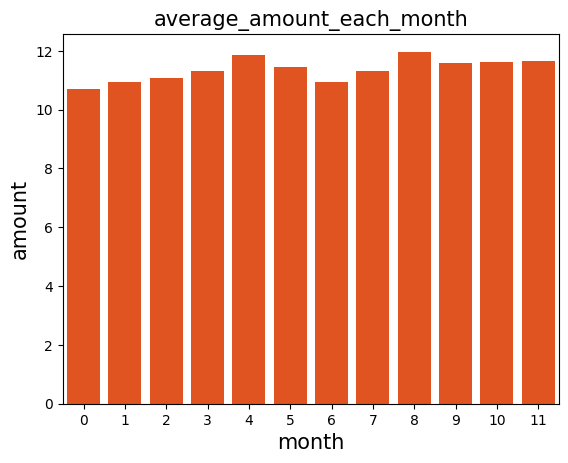

In [16]:
# calulating average amount month wise 
month_data = df.groupby("month")["amount"].mean()

#ploting average amount month wise
sns.barplot(data=month_data,x=np.arange(12),y=month_data,color="orangered")
plt.title("average_amount_each_month",fontsize=15)
plt.xlabel("month",fontsize=15)
plt.ylabel("amount",fontsize=15)
plt.show()

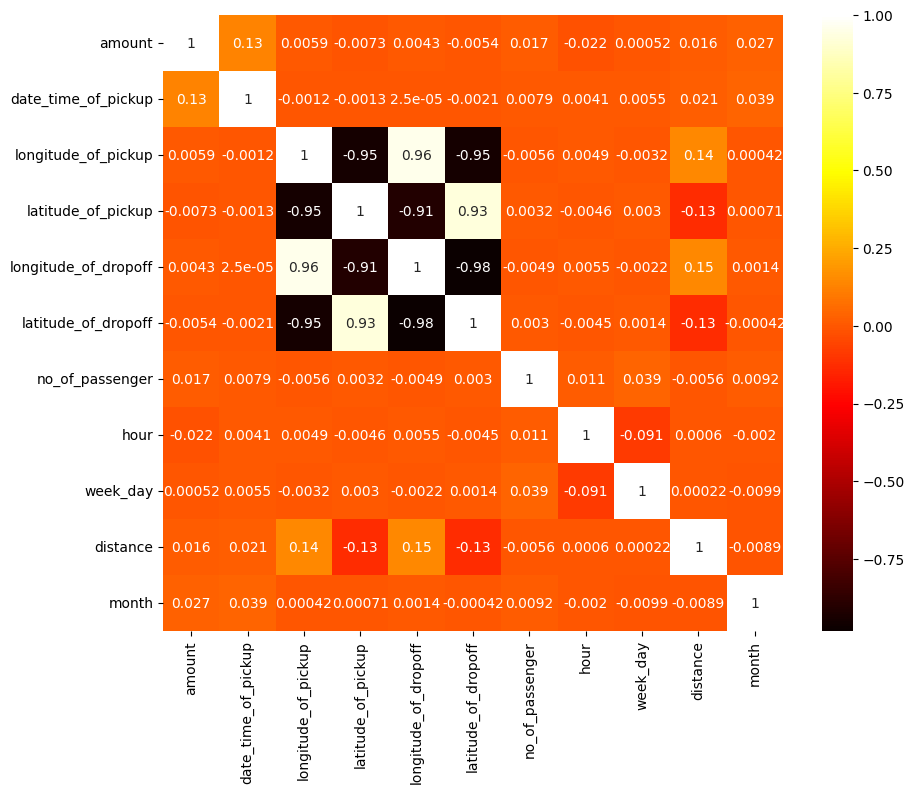

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:,1:].corr(),annot=True,cmap="hot");

 Upon exploring the dataset, no significant correlation was found among the variables.
 Various correlation measures yielded coefficients close to zero,
 suggesting a lack of linear relationship between the variables in this dataset.
 Further analysis utilizing non-linear models or domain-specific feature engineering
 may be required to uncover potential dependencies or interactions between the variables.


In [18]:
# funtion for chaek outlier summary of data
def outlier_summary(X,plot=False):
    a = len(max(X.columns, key=len)) + 1
    k = f"| {'Column_name'.ljust(a)} | {'Num_out'.rjust(5)} | {'outlier%'.rjust(5)} | {'Lower_bond'.rjust(10)} | {'Upper_bond'.rjust(10)} |"
    print('\033[95m' + '\033[1m' + "Outlier Summary".center(80))
    print("-" * len(k))
    print(k)
    print("-" * len(k))
    
    # select data datatype having int, float
    data = X.select_dtypes(include=["int", "float"])
    
    # function for print box-plot
    def mapout(da):
        l = (len(da.columns)//2)
        if l%2 != 0:
            l += 1
        # define sub plot size and figsie    
        fig,axs = plt.subplots(l,2,figsize=(10,20))
        axs = axs.flatten()
        
        # plot data of each column 
        for i,e in enumerate(da.columns):
            sns.boxplot(data=da,x=e,ax=axs[i],color="orangered",)
        
        plt.tight_layout()
        plt.show()
           
            
      
    
        
    # function for calculate no. of outlier in column    
    for col in data.columns:
        q1 = X[col].quantile(0.25)
        q3 = X[col].quantile(0.75)
        iqr = q3 - q1
        lw = q1 - 1.5 * iqr
        uw = q3 + 1.5 * iqr
        out_ind = X[(X[col] > uw) | (X[col] < lw)].index

        
        #calculate percentage of outlier in column
        num_out = len(out_ind)
        num_out_percent = round(num_out / len(X) * 100, 2)

        print(
            f"| {col.capitalize().ljust(a)} | {str(num_out).rjust(7)} | {str(num_out_percent).rjust(8)} | {str(round(lw, 2)).rjust(10)} | {str(round(uw, 2)).rjust(10)} |")
    print("-" * len(k) + '\033[0m')
    if plot == True:
        mapout(data)

                                Outlier Summary                                 
------------------------------------------------------------------------
| Column_name           | Num_out | outlier% | Lower_bond | Upper_bond |
------------------------------------------------------------------------
| Amount                |    4365 |     8.73 |      -3.75 |      22.25 |
| Longitude_of_pickup   |    3429 |     6.86 |     -74.03 |     -73.93 |
| Latitude_of_pickup    |    2363 |     4.73 |      40.69 |      40.82 |
| Longitude_of_dropoff  |    3589 |     7.18 |     -74.03 |     -73.92 |
| Latitude_of_dropoff   |    3139 |     6.28 |      40.68 |      40.82 |
| No_of_passenger       |    5458 |    10.92 |       -0.5 |        3.5 |
| Hour                  |       0 |      0.0 |       -6.0 |       34.0 |
| Week_day              |       0 |      0.0 |       -5.0 |       11.0 |
| Distance              |    4238 |     8.48 |       -2.8 |       7.92 |
| Month                 |       0 |      0.

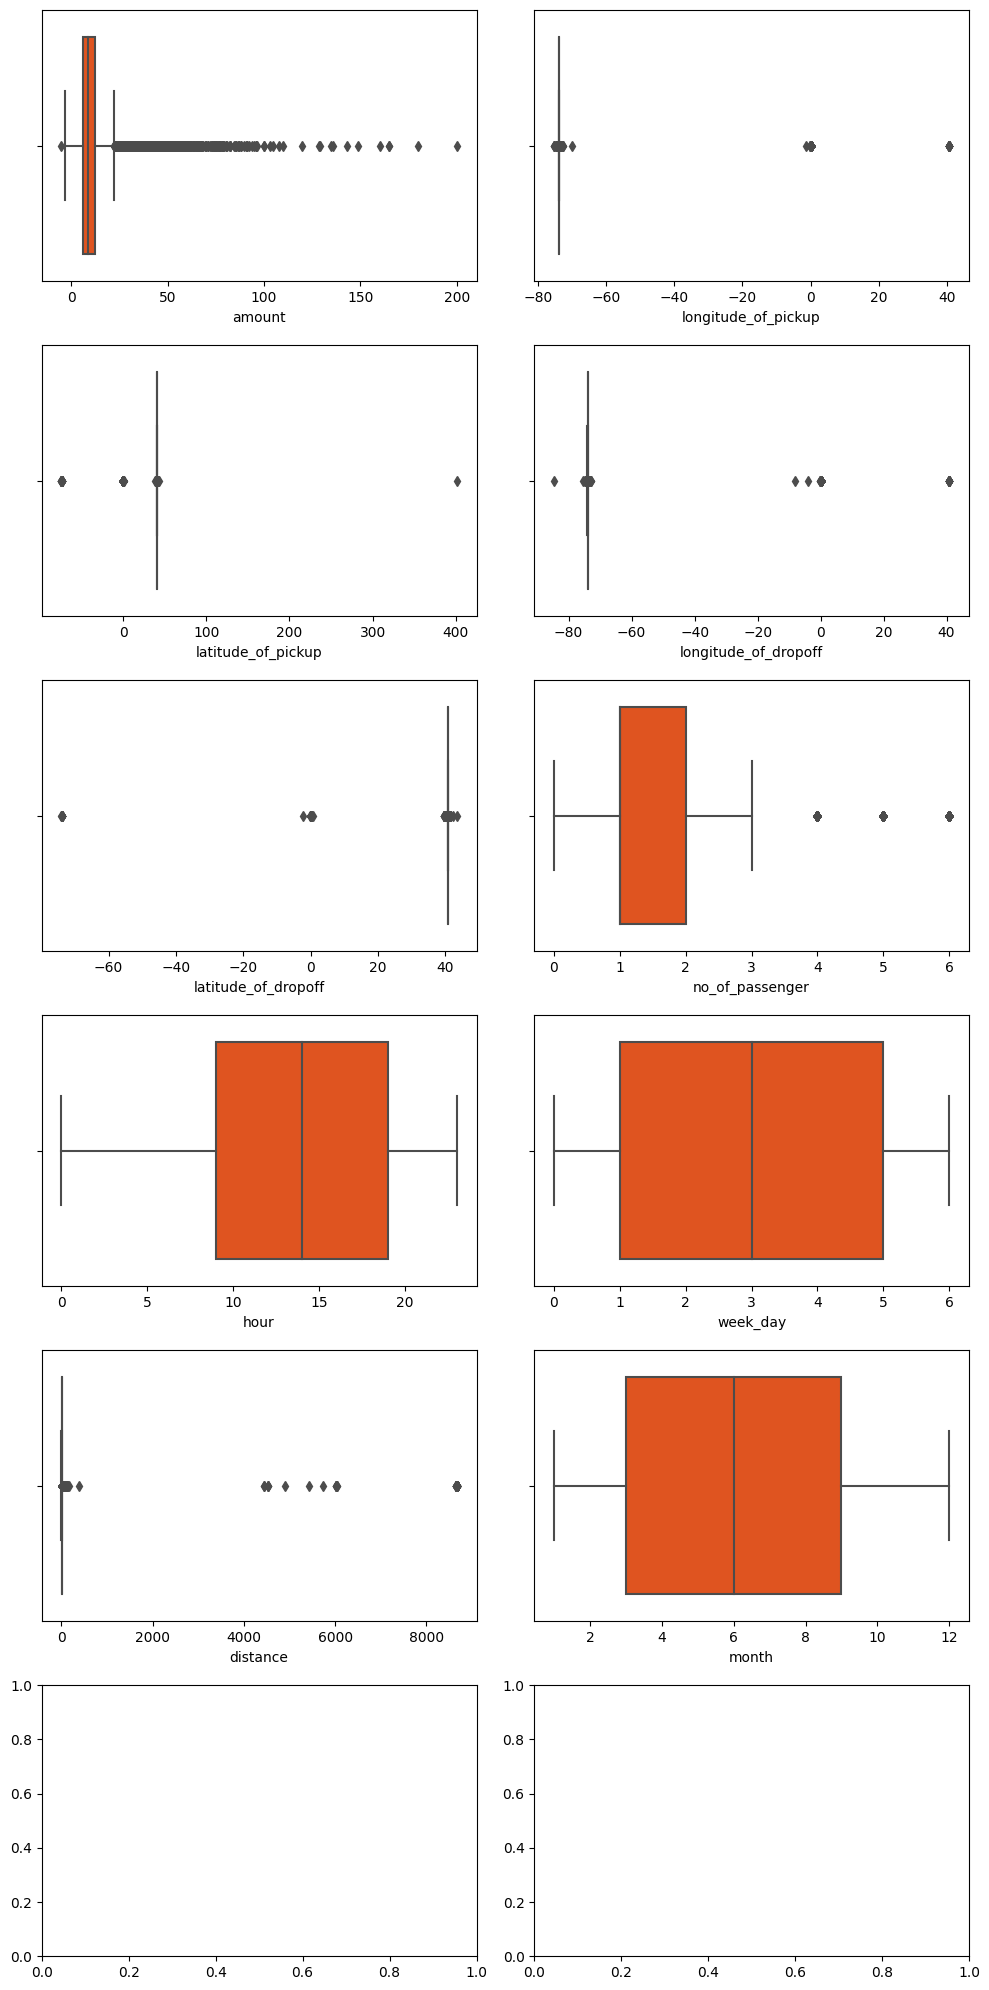

In [19]:
outlier_summary(df,plot=True)

For instance, the columns like Amount, Longitude_of_pickup, Latitude_of_pickup, Longitude_of_dropoff, Latitude_of_dropoff, No_of_passenger, and Distance have notable percentages of outliers, ranging from approximately 4.73% to 10.92%.

The bounds (lower and upper) indicate the cutoff values beyond which data points are considered outliers. For example, in the Amount column, values less than approximately -3.75 or greater than 22.25 are identified as outliers.

Understanding and handling outliers is crucial for many analyses. Depending on your goals, you might decide to:

    Remove outliers: You could choose to exclude these data points from your analysis if they significantly skew your results.
    Transform or adjust outliers: Apply transformations (e.g., log transformation) to make extreme values less influential.
    Use algorithms robust to outliers: Some models or algorithms are less sensitive to outliers.

In [30]:
df.select_dtypes(include=["int","float"]).columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'hour', 'week_day', 'distance', 'month'],
      dtype='object')

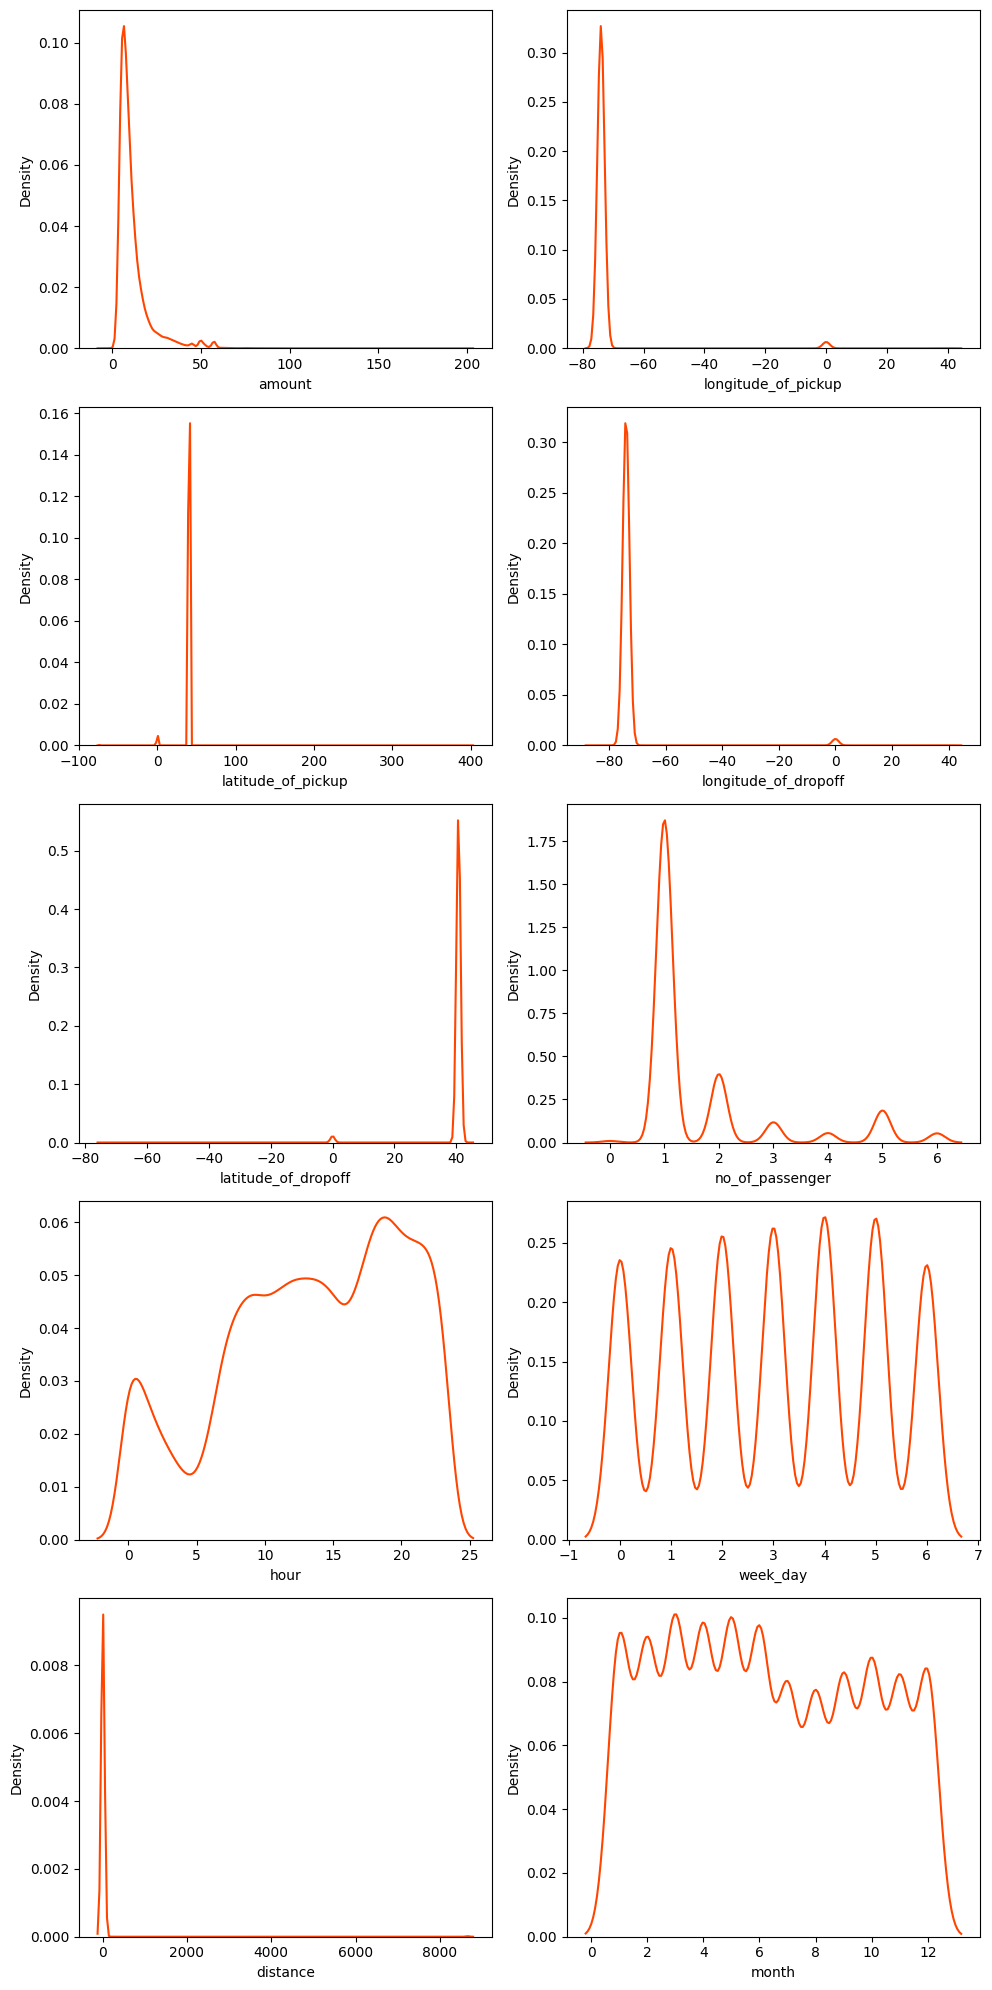

In [21]:

# cheaking distribution of data   
fig,axs = plt.subplots(5,2,figsize=(10,20))
axs = axs.flatten()

# plot data of each column 
for i,e in enumerate(df.select_dtypes(include=["int","float"])):
    sns.kdeplot(data=df,x=e,ax=axs[i],color="orangered",)

plt.tight_layout()
plt.show()


The dataset exhibits skewness in several variables, as evidenced by their non-normal distributions.
Positive/negative skewness is observed in [list the variable names with positive/negative skewness].
The presence of skewness might affect the performance of certain statistical models that assume normality.
Consider applying appropriate transformations (e.g., log transformation) to reduce skewness and improve model performance.
Additionally, exploring robust statistical methods or models less sensitive to skewed distributions could be beneficial.


In [22]:
# import folium for ploting data latitude longitude on map to understand 
import folium
new_york=folium.Map(location=[40.730610, -73.935242], zoom_start=12)


In [23]:
# polting 100 pickup loction on map
for i in df.index[:100]:
    folium.CircleMarker(location=[df['latitude_of_pickup'][i],df['longitude_of_pickup'][i]],color='red').add_to(new_york)

In [24]:
# polting 100 drop loction on map
for i in df.index[:100]:
    folium.CircleMarker(location=[df['latitude_of_dropoff'][i],df['longitude_of_dropoff'][i]],color='blue').add_to(new_york)

In [25]:
new_york

###  from this we see the some points far from  new york

In [26]:
# import plotly for understanding data points location of pickup or drop 
import plotly
%matplotlib inline

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

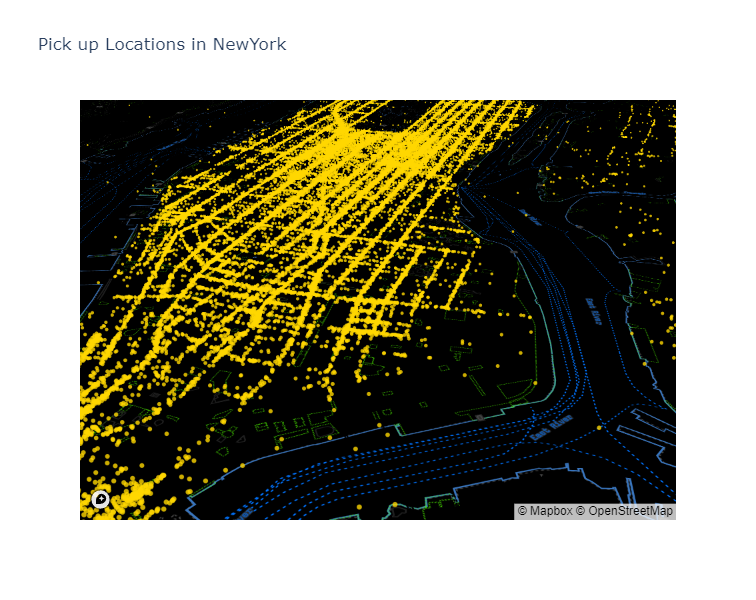

In [27]:
data = [go.Scattermapbox(
            lat= df['latitude_of_pickup'] ,
            lon= df['longitude_of_pickup'],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'gold',
                opacity = .8,
            ),
          )]
layout = go.Layout(autosize=False,
                   mapbox= dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                                bearing=10,
                                pitch=60,
                                zoom=13,
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130),
                                style= "mapbox://styles/shaz13/cjiog1iqa1vkd2soeu5eocy4i"),
                    width=900,
                    height=600, title = "Pick up Locations in NewYork")

fig = dict(data=data, layout=layout)
offline.iplot(fig)

### we can see clearly that some pickup location cordinates soo far from newyork they are outlier to data and 
### some loaction on sea thats also outlier to the data

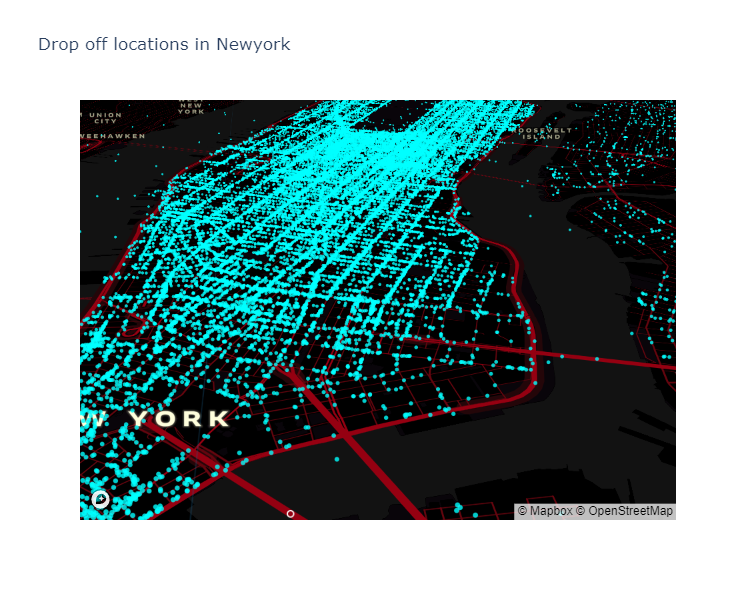

In [28]:
data = [go.Scattermapbox(
            lat= df['latitude_of_dropoff'] ,
            lon= df['longitude_of_dropoff'],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'cyan',
                opacity = .8,
            ),
          )]
layout = go.Layout(autosize=False,
                   mapbox= dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                                bearing=10,
                                pitch=60,
                                zoom=13,
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130),
                                style= "mapbox://styles/shaz13/cjk4wlc1s02bm2smsqd7qtjhs"),
                    width=900,
                    height=600, title = "Drop off locations in Newyork")
fig = dict(data=data, layout=layout)
offline.iplot(fig)

 ### You can then investigate these specific entries to understand why they might be far from New York City. They could be errors in data entry, intentional long-distance trips, or simply outliers that need further examination or handling.

<h1><font color="orange"><center>Data_processing</center></font><h1>

In [29]:
# removing data points that,s far from new york city 
df = df[(df['longitude_of_pickup']>=-75) & 
                    (df['longitude_of_pickup']<=-72) & 
                    (df['longitude_of_dropoff']>=-75) & 
                    (df['longitude_of_dropoff']<=-72) & 
                    (df['latitude_of_pickup']>=40) & 
                    (df['latitude_of_pickup']<=42) & 
                    (df['latitude_of_dropoff']>=40) & 
                    (df['latitude_of_dropoff']<=42) & 
                    (df['amount']>=1) & 
                    (df['amount']<=500) &
                    (df['no_of_passenger']>=1) & 
                    (df['no_of_passenger']<=6)]

### The above code will filter out rows where the pickup or drop-off locations are significantly distant from New York City based on latitude and longitude boundaries.

In [30]:
#handling outlirs from output column
df.drop(index=df[(df["amount"] <= 0 )].index,inplace=True)
df.loc[df["amount"]>40.25,["amount"]] = df[df["amount"]>40.25]["amount"]*0.60
# df.loc[df["amount"]>22.25,["amount"]] = 22.25
df.drop(index=df[df["amount"]>50].index,inplace=True)


/tmp/ipykernel_33/2717353752.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_33/2717353752.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
# df["distance"] = np.sqrt(df["distance"])
df.drop(index=df[df["distance"]>24].index,inplace=True)
df.drop(index=df[df["distance"]==0].index,inplace=True)

/tmp/ipykernel_33/1409434199.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_33/1409434199.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df.loc[df["no_of_passenger"]>4,"no_of_passenger"] = df.loc[df["no_of_passenger"]>4,"no_of_passenger"]*0.80

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48080 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             48080 non-null  object             
 1   amount                48080 non-null  float64            
 2   date_time_of_pickup   48080 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   48080 non-null  float64            
 4   latitude_of_pickup    48080 non-null  float64            
 5   longitude_of_dropoff  48080 non-null  float64            
 6   latitude_of_dropoff   48080 non-null  float64            
 7   no_of_passenger       48080 non-null  float64            
 8   hour                  48080 non-null  int32              
 9   week_day              48080 non-null  int64              
 10  distance              48080 non-null  float64            
 11  month                 48080 non-null  int32              
dtypes: dateti

In [34]:
#spliting data input and output data X is input data to  model y is output
X = df[["hour","distance","week_day"]]
y = df.iloc[:,(df.columns == "amount")]

In [35]:
#chaeking  shape of input and output data both are same or not
X.shape,y.shape

((48080, 3), (48080, 1))

<h1><font color="orange"><center>Spliting_Data</center></font><h1>

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#spliting data into train and validation part X for train and y for validation
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
# chaeking shapes are input and output are same or not
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((33656, 3), (14424, 3), (33656, 1), (14424, 1))

In [39]:
#scaling data data beacuse distribution is not normal data is skwed
# from sklearn.preprocessing import MinMaxScaler
# m = MinMaxScaler()
# X_train = pd.DataFrame(data=m.fit_transform(X_train),index=X_train.index,columns=X_train.columns)
# X_test = pd.DataFrame(data=m.fit_transform(X_test),index=X_test.index,columns=X_test.columns)

<h1><font color="orange"><center>model_traning_Random_Forest_Regressor </center></font><h1> 

In [40]:
#import random_forest_regressor
from sklearn.ensemble import RandomForestRegressor
 

In [41]:
# define model with 100 estimators max_depth of tree =9, min_samles_leaf= 6,random_state= 0


regressor = RandomForestRegressor(n_estimators=100,
                                 max_depth = 9,min_samples_leaf=6,
                                  random_state=0)

In [42]:
#feating model /train model on X_train ,y_train
regressor.fit(X_train,y_train)

/tmp/ipykernel_33/1771692972.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=9, min_samples_leaf=6, random_state=0)

In [43]:
# chaking score on train data
regressor.score(X_train,y_train)

0.8320957529140092

In [44]:
# chaking score on validation data
regressor.score(X_test,y_test)

0.8007332734614456

In [45]:
#calculating rmse on train and test prediction
import math
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, regressor.predict(X_train),squared=False)
rmse1= mean_squared_error(y_test, regressor.predict(X_test),squared=False)

print(f"rmse train : {rmse}")
print(f"rmse test : {rmse1}")

rmse train : 2.932898762509366
rmse test : 3.1547223504670923


In [46]:
#loading testing data
test = pd.read_csv("/kaggle/input/test-data/test.csv",parse_dates=["pickup_datetime"])

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float64            
 4   dropoff_longitude  9914 non-null   float64            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 542.3+ KB


In [48]:
# cheaking outlier test data
outlier_summary(test)

                                Outlier Summary                                 
---------------------------------------------------------------------
| Column_name        | Num_out | outlier% | Lower_bond | Upper_bond |
---------------------------------------------------------------------
| Pickup_longitude   |     492 |     4.96 |     -74.03 |     -73.93 |
| Pickup_latitude    |     329 |     3.32 |      40.69 |      40.81 |
| Dropoff_longitude  |     545 |      5.5 |     -74.03 |     -73.92 |
| Dropoff_latitude   |     471 |     4.75 |      40.69 |      40.82 |
| Passenger_count    |    1079 |    10.88 |       -0.5 |        3.5 |
---------------------------------------------------------------------


<h1><font color ="orange"><center>Feature enginearing on test data</center></font></h1>

In [49]:
#  function for change data into distance in km
from math import cos, asin, sqrt, pi

def distance(lon1,lat1,lon2,lat2):
    r = 6371 # km
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [50]:
# new feature/column for data frame  distance 
data =[]
for x in test.iloc[:,2:6].values:
  data.append(round(distance(x[0],x[1],x[2],x[3]),2))
  
test["distance"] = data

In [51]:
# new feature/column for data frame  hour 
test["hour"] = test["pickup_datetime"].dt.hour

In [52]:
# new feature/column for data frame  hour 
test["week_day"]= test.pickup_datetime.apply(lambda x : x.weekday())

In [53]:
# after adding new columns data looks like
test

key           pickup_datetime  pickup_longitude  \
0     2015-01-27 13:08:24.0000002 2015-01-27 13:08:24+00:00        -73.973320   
1     2015-01-27 13:08:24.0000003 2015-01-27 13:08:24+00:00        -73.986862   
2     2011-10-08 11:53:44.0000002 2011-10-08 11:53:44+00:00        -73.982524   
3     2012-12-01 21:12:12.0000002 2012-12-01 21:12:12+00:00        -73.981160   
4     2012-12-01 21:12:12.0000003 2012-12-01 21:12:12+00:00        -73.966046   
...                           ...                       ...               ...   
9909  2015-05-10 12:37:51.0000002 2015-05-10 12:37:51+00:00        -73.968124   
9910  2015-01-12 17:05:51.0000001 2015-01-12 17:05:51+00:00        -73.945511   
9911  2015-04-19 20:44:15.0000001 2015-04-19 20:44:15+00:00        -73.991600   
9912  2015-01-31 01:05:19.0000005 2015-01-31 01:05:19+00:00        -73.985573   
9913  2015-01-18 14:06:23.0000006 2015-01-18 14:06:23+00:00        -73.988022   

      pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0           40.763805         -73.981430         40.743835                1   
1           40.719383         -73.998886         40.739201                1   
2           40.751260         -73.979654         40.746139                1   
3           40.767807         -73.990448         40.751635                1   
4           40.789775         -73.988565         40.744427                1   
...               ...                ...               ...              ...   
9909        40.796997         -73.955643         40.780388                6   
9910        40.803600         -73.960213         40.776371                6   
9911        40.726608         -73.789742         40.647011                6   
9912        40.735432         -73.939178         40.801731                6   
9913        40.754070         -74.000282         40.759220                6   

      distance  hour  week_day  
0         2.32    13         1  
1         2.43    13         1  
2         0.62    11         5  
3         1.96    21         5  
4         5.39    21         5  
...        ...   ...       ...  
9909      2.12    12         6  
9910      3.27    17         0  
9911     19.18    20         6  
9912      8.34     1         5  
9913      1.18    14         6  

[9914 rows x 10 columns]

In [54]:
# predict output for test data and making submission file for submit on kagle compition
y_final = regressor.predict(test[["hour","distance","week_day"]])
submit = pd.DataFrame({'key': test.pickup_datetime, 'fare_amount': y_final},columns = ['key', 'fare_amount'])
submit.to_csv('submission.csv', index = False)


In [56]:
import joblib

In [57]:
joblib.dump(regressor,"model.joblib")

['model.joblib']

In [67]:
m = joblib.load("model.joblib")

In [68]:
m.predict([[22,5,4]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([13.39999186])

In [28]:
x1 = np.random.randn(200) - 2
x2 = np.random.randn(200)
x3 = np.random.randn(200) + 2

data = [x1,x2,x3]

In [29]:
data

[array([-0.43980156, -3.68592329, -4.11777238, -0.70309212, -1.90737273,
        -1.25126677, -0.59906524, -0.47433809, -3.51734489, -2.08932579,
        -3.08072216, -1.74494405, -0.49019836, -1.90901069, -2.72611943,
        -2.66032008,  0.7491274 , -2.92560005, -2.65671777, -1.32351343,
        -2.50307643, -2.69071405, -0.83432786, -1.9399946 , -2.56247389,
        -1.82475831, -2.18558861, -0.85156333, -3.42668052, -3.0022673 ,
        -3.64537315, -2.2737363 , -3.59812035, -0.33256182, -2.34081603,
        -0.29079209, -2.16201853, -2.31599873, -1.67104889, -2.99522377,
        -1.0761804 , -1.6076156 , -2.54159926, -0.18888709, -1.383758  ,
        -0.90332939, -2.21639879, -2.52474194, -2.7323024 , -1.14458337,
        -1.54069807, -2.44099795, -1.83955385, -1.18012719, -3.29797894,
        -2.11182263, -1.56836906, -1.86947159, -1.81486582, -2.72474258,
        -3.65285963, -1.54041425, -2.01170861, -1.79250504, -2.73913667,
        -1.29654159, -0.70940577, -2.40610644, -2.7